In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
from sklearn.model_selection import train_test_split
import numpy as np
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

In [2]:
df18 = pd.read_csv('data/cleaned/df18_eda')

In [3]:
df18.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)

In [4]:
df18.head(2)

,total_population,california_county,sb_535_disadvantaged,ozone,pm2_5,diesel_pm,drinking_water,pesticides,tox_release,traffic,cleanup_sites,groundwater_threats,haz_waste,imp_water_bodies,solid_waste,pollution_burden_score,lbw,education,linguistic_isolation,unemployment,housing_burden,Pop. Char. Score,less_10_yrs,yrs_11_64,greater_65,hispanic,white,african_american,native_american,asian_american,other,prev_ozone,prev_pm2_5,prev_diesel_pm,prev_drinking_water,prev_tox_release,prev_traffic,prev_groundwater_threats,prev_haz_waste,prev_imp_water_bodies,prev_solid_waste,prev_lbw,pm_breakdown,dw_breakdown
0,3174,Fresno,Yes,0.065,15.40,48.524,681.20,2.75,18551.957190,909.14,80.5,45.75,0.795,0,21.75,9.85,7.44,53.3,16.2,17.6,26.0,9.55,18.8,73.6,7.6,65.3,4.2,24.6,0.5,3.5,1.8,0.255228,14.746087,44.23,519.882370,96414.458370,1217.535680,55.75,0.520,0,5.0,0.058025,top,Top
1,6133,San Bernardino,Yes,0.062,13.31,38.556,904.66,1.37,7494.236622,782.26,66.2,36.00,1.250,5,12.00,10.00,7.04,53.3,33.4,12.3,34.1,9.07,19.7,76.1,4.2,91.1,5.8,0.7,0.3,1.4,0.7,0.465401,13.888224,47.08,604.311803,8122.687693,1232.874128,49.00,1.845,5,2.0,0.063895,top,Top


## Baseline Model

### Categorical Features

In [5]:
#create dummy variables
cc_dummies = pd.get_dummies(df18['california_county'], prefix='cc', drop_first=True)
disadvantaged_dummies = pd.get_dummies(df18['sb_535_disadvantaged'], prefix='disadvantaged', drop_first=True)

df18 = pd.concat([df18, cc_dummies, disadvantaged_dummies], axis=1)

In [6]:
df18.head(2)

,total_population,california_county,sb_535_disadvantaged,ozone,pm2_5,diesel_pm,drinking_water,pesticides,tox_release,traffic,cleanup_sites,groundwater_threats,haz_waste,imp_water_bodies,solid_waste,pollution_burden_score,lbw,education,linguistic_isolation,unemployment,housing_burden,Pop. Char. Score,less_10_yrs,yrs_11_64,greater_65,hispanic,white,african_american,native_american,asian_american,other,prev_ozone,prev_pm2_5,prev_diesel_pm,prev_drinking_water,prev_tox_release,prev_traffic,prev_groundwater_threats,prev_haz_waste,prev_imp_water_bodies,prev_solid_waste,prev_lbw,pm_breakdown,dw_breakdown,cc_Alpine,cc_Amador,cc_Butte,cc_Calaveras,cc_Colusa,cc_Contra Costa,...,cc_Fresno,cc_Glenn,cc_Humboldt,cc_Imperial,cc_Inyo,cc_Kern,cc_Kings,cc_Lake,cc_Lassen,cc_Los Angeles,cc_Madera,cc_Marin,cc_Mariposa,cc_Mendocino,cc_Merced,cc_Modoc,cc_Mono,cc_Monterey,cc_Napa,cc_Nevada,cc_Orange,cc_Placer,cc_Plumas,cc_Riverside,cc_Sacramento,cc_San Benito,cc_San Bernardino,cc_San Diego,cc_San Francisco,cc_San Joaquin,cc_San Luis Obispo,cc_San Mateo,cc_Santa Barbara,cc_Santa Clara,cc_Santa Cruz,cc_Shasta,cc_Sierra,cc_Siskiyou,cc_Solano,cc_Sonoma,cc_Stanislaus,cc_Sutter,cc_Tehama,cc_Trinity,cc_Tulare,cc_Tuolumne,cc_Ventura,cc_Yolo,cc_Yuba,disadvantaged_Yes
0,3174,Fresno,Yes,0.065,15.40,48.524,681.20,2.75,18551.957190,909.14,80.5,45.75,0.795,0,21.75,9.85,7.44,53.3,16.2,17.6,26.0,9.55,18.8,73.6,7.6,65.3,4.2,24.6,0.5,3.5,1.8,0.255228,14.746087,44.23,519.882370,96414.458370,1217.535680,55.75,0.520,0,5.0,0.058025,top,Top,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,6133,San Bernardino,Yes,0.062,13.31,38.556,904.66,1.37,7494.236622,782.26,66.2,36.00,1.250,5,12.00,10.00,7.04,53.3,33.4,12.3,34.1,9.07,19.7,76.1,4.2,91.1,5.8,0.7,0.3,1.4,0.7,0.465401,13.888224,47.08,604.311803,8122.687693,1232.874128,49.00,1.845,5,2.0,0.063895,top,Top,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [7]:
df18.rename(columns = {'cc_Contra Costa': 'cc_Contra_Costa', 'cc_Los Angeles': 'cc_Los_Angeles', 
           'cc_Del Norte': 'cc_Del_Norte', 'cc_El Dorado': 'cc_El_Dorado',
           'cc_San Benito': 'cc_San_Benito', 'cc_San Bernardino': 'cc_San_Bernardino', 'cc_San Diego': 'cc_San_Diego', 
           'cc_San Francisco': 'cc_San_Francisco', 'cc_San Joaquin': 'cc_San_Joaquin', 'cc_San Luis Obispo': 'cc_SLO', 
           'cc_San Mateo': 'cc_San_Mateo', 'cc_Santa Barbara': 'cc_Santa_Barbara', 'cc_Santa Clara': 'cc_Santa_Clara', 
           'cc_Santa Cruz': 'cc_Santa_Cruz', 'cc_Tehama ': 'cc_Tehama'}, inplace = True)

In [8]:
df18.head(2)

,total_population,california_county,sb_535_disadvantaged,ozone,pm2_5,diesel_pm,drinking_water,pesticides,tox_release,traffic,cleanup_sites,groundwater_threats,haz_waste,imp_water_bodies,solid_waste,pollution_burden_score,lbw,education,linguistic_isolation,unemployment,housing_burden,Pop. Char. Score,less_10_yrs,yrs_11_64,greater_65,hispanic,white,african_american,native_american,asian_american,other,prev_ozone,prev_pm2_5,prev_diesel_pm,prev_drinking_water,prev_tox_release,prev_traffic,prev_groundwater_threats,prev_haz_waste,prev_imp_water_bodies,prev_solid_waste,prev_lbw,pm_breakdown,dw_breakdown,cc_Alpine,cc_Amador,cc_Butte,cc_Calaveras,cc_Colusa,cc_Contra_Costa,...,cc_Fresno,cc_Glenn,cc_Humboldt,cc_Imperial,cc_Inyo,cc_Kern,cc_Kings,cc_Lake,cc_Lassen,cc_Los_Angeles,cc_Madera,cc_Marin,cc_Mariposa,cc_Mendocino,cc_Merced,cc_Modoc,cc_Mono,cc_Monterey,cc_Napa,cc_Nevada,cc_Orange,cc_Placer,cc_Plumas,cc_Riverside,cc_Sacramento,cc_San_Benito,cc_San_Bernardino,cc_San_Diego,cc_San_Francisco,cc_San_Joaquin,cc_SLO,cc_San_Mateo,cc_Santa_Barbara,cc_Santa_Clara,cc_Santa_Cruz,cc_Shasta,cc_Sierra,cc_Siskiyou,cc_Solano,cc_Sonoma,cc_Stanislaus,cc_Sutter,cc_Tehama,cc_Trinity,cc_Tulare,cc_Tuolumne,cc_Ventura,cc_Yolo,cc_Yuba,disadvantaged_Yes
0,3174,Fresno,Yes,0.065,15.40,48.524,681.20,2.75,18551.957190,909.14,80.5,45.75,0.795,0,21.75,9.85,7.44,53.3,16.2,17.6,26.0,9.55,18.8,73.6,7.6,65.3,4.2,24.6,0.5,3.5,1.8,0.255228,14.746087,44.23,519.882370,96414.458370,1217.535680,55.75,0.520,0,5.0,0.058025,top,Top,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,6133,San Bernardino,Yes,0.062,13.31,38.556,904.66,1.37,7494.236622,782.26,66.2,36.00,1.250,5,12.00,10.00,7.04,53.3,33.4,12.3,34.1,9.07,19.7,76.1,4.2,91.1,5.8,0.7,0.3,1.4,0.7,0.465401,13.888224,47.08,604.311803,8122.687693,1232.874128,49.00,1.845,5,2.0,0.063895,top,Top,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Drop Columns

In [9]:
df18.drop(columns = ['california_county', 'sb_535_disadvantaged', 'pm_breakdown', 'dw_breakdown'], axis = 1, 
         inplace = True)

## Train Test Split

In [10]:
df18_features = df18.drop(columns = 'lbw', axis = 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df18_features, 
                                                    df18['lbw'], 
                                                    random_state=20, 
                                                    test_size=0.2)

## Baseline Model

In [12]:
#fit to train data

#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

In [13]:
#predict on train and test set
y_train_pred = lm.predict(X_train)

y_test_pred = lm.predict(X_test)

In [14]:
#give true value and predictions
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
df3_rmse = np.sqrt(mse)

In [15]:
print(mse)
print(df3_rmse)

0.7988475619875355
0.8937827263868638


In [16]:
#give true value and predictions
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
df3_test_rmse = np.sqrt(test_mse)

In [17]:
print(test_mse)
print(df3_test_rmse)

0.860141092490355
0.9274379184022804


### EVALUATE MODEL

/Users/jaclynhenn/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='lbw'>

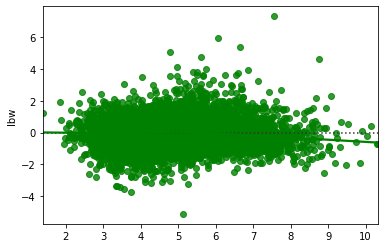

In [18]:
#Plot Residuals
sns.residplot(y_train_pred, y_train, lowess=True, color="g")

/Users/jaclynhenn/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jaclynhenn/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


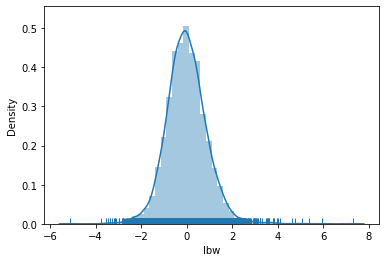

In [19]:
#Plot Residuals
residuals_2 =  y_train - y_train_pred
sns.distplot(residuals_2, kde=True, rug=True);

In [20]:
#Run Shapiro-Wilk test 
from scipy import stats
stats.shapiro(residuals_2)

/Users/jaclynhenn/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.979170024394989, pvalue=1.179593045716825e-29)

## Polynomials and Interactions

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
from itertools import combinations

regression = LinearRegression()

X = df18.drop('lbw', axis=1)
y = df18['lbw']

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X, y, scoring='neg_mean_squared_error', cv=crossvalidation))


interactions = []

feat_combinations = combinations(X.columns, 2)

data = X.copy()
for i, (a, b) in enumerate(feat_combinations):
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(regression, data, y, scoring='neg_mean_squared_error', cv=crossvalidation))
    if score > baseline:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)

0
50
100
150
200
250
300
350
400
450
500
550
600
650


KeyboardInterrupt: 

In [ ]:
interactions

In [ ]:
len(interactions)

In [ ]:
def create_interaction(i, dataframe, interactions):
    str_count = str(i)
    new_column = 'pi_' + str_count
    dataframe[new_column] = dataframe[interactions[i][0]] * dataframe[interactions[i][1]]

In [ ]:
for i in range(0,len(interactions)):
    create_interaction(i, df18, interactions)

In [ ]:
df18.head(2)

### Add Polynomials and Interactions

In [ ]:
df18_features = df18.drop(columns = 'lbw', axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df18_features, 
                                                    df18['lbw'], 
                                                    random_state=20, 
                                                    test_size=0.2)

In [ ]:
#fit to train data

#instantiate a linear regression object
lm_p_i = LinearRegression()

#fit the linear regression to the data
lm_p_i = lm_p_i.fit(X_train, y_train)

In [ ]:
#predict on train and test set
y_train_pred_pi = lm_p_i.predict(X_train)

y_test_pred_pi = lm_p_i.predict(X_test)

In [ ]:
#give true value and predictions
mae_pi = mean_absolute_error(y_train, y_train_pred_pi)
mse_pi = mean_squared_error(y_train, y_train_pred_pi)
rmse_pi = np.sqrt(mse_pi)

In [ ]:
print(mse)
print(df3_rmse)
print(mse_pi)
print(rmse_pi)

In [ ]:
#give true value and predictions
test_mae_pi = mean_absolute_error(y_test, y_test_pred_pi)
test_mse_pi = mean_squared_error(y_test, y_test_pred_pi)
test_rmse_pi = np.sqrt(test_mse_pi)

In [ ]:
print(test_mse)
print(df3_test_rmse)
print(test_mse_pi)
print(test_rmse_pi)

## Select K Best

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

selector = SelectKBest(f_regression, k=200)

selector.fit(X_train, y_train)

In [ ]:
selector.get_support()

In [ ]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest.fit(X_train[selected_columns], y_train)

#predict train
y_train_pred_kbest = lm_kbest.predict(X_train[selected_columns])

#give true value and predictions
mae_kbest = mean_absolute_error(y_train, y_train_pred_kbest)
mse_kbest = mean_squared_error(y_train, y_train_pred_kbest)
rmse_kbest = np.sqrt(mse_kbest)

print(mse)
print(df3_rmse)
print(mse_pi)
print(rmse_pi)
print(mse_kbest)
print(rmse_kbest)

In [ ]:
#predict test
y_test_pred_kbest = lm_kbest.predict(X_test[selected_columns])

#give true value and predictions
test_mae_kbest = mean_absolute_error(y_test, y_test_pred_kbest)
test_mse_kbest = mean_squared_error(y_test, y_test_pred_kbest)
test_rmse_kbest = np.sqrt(test_mse_kbest)

In [ ]:
print(test_mse)
print(df3_test_rmse)
print(test_mse_pi)
print(test_rmse_pi)
print(test_mse_kbest)
print(test_rmse_kbest)

## RFE

In [ ]:
from sklearn.feature_selection import RFECV

In [ ]:
ols = LinearRegression()
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=7,  scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit recursive feature eliminator 
selector.fit(X_train[selected_columns], y_train)

In [ ]:
#create variables for features selected for model and removed
selected_rfe = X_train[selected_columns].columns[selector.support_]
removed_rfe = X_train[selected_columns].columns[~selector.support_]

In [ ]:
#check len
len(selected_rfe)

In [ ]:
selected_rfe

In [ ]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

In [ ]:
y_train_pred_rfe = lm_rfe.predict(X_train[selected_rfe])

In [ ]:
#give true value and predictions
mse_rfe = mean_squared_error(y_train, y_train_pred_rfe)
rmse_rfe = np.sqrt(mse_rfe)

print(mse)
print(df3_rmse)
print(mse_pi)
print(rmse_pi)
print(mse_kbest)
print(rmse_kbest)
print(mse_rfe)
print(rmse_rfe)

In [ ]:
y_test_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

In [ ]:
test_mse_rfe = mean_squared_error(y_test, y_test_pred_rfe)
test_rmse_rfe = np.sqrt(test_mse_rfe)

print(test_mse)
# print(df3_test_rmse)
print(test_mse_pi)
# print(test_rmse_pi)
print(test_mse_kbest)
# print(test_rmse_kbest)
print(test_mse_rfe)
# print(test_rmse_rfe)

## PCA

In [ ]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Standardize the features
X = StandardScaler().fit_transform(X_train[selected_rfe])

In [ ]:
# Import PCA
from sklearn.decomposition import PCA

# Instantiate PCA
pca = PCA(n_components=10)

# Fit PCA
principalComponents = pca.fit_transform(X)

In [ ]:
# Create a new dataset from principal components 
df = pd.DataFrame(data = principalComponents, 
                  columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 
                            'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

target = pd.Series(df18['lbw'], name='target')

result_df = pd.concat([df, target], axis=1)
result_df.head(5)

In [ ]:
# Calculate the variance explained by priciple components
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

In [ ]:
# Run the classifer on PCA'd data
X = result_df[['PC1']]
y = result_df['target']

model = LinearRegression()
model.fit(X, y)
